# Breast Cancer Linear and Logistic Regression

##  Importing Packages

In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import warnings
warnings.filterwarnings('ignore')


plt.style.use('ggplot')

## Load the data

In [2]:
!wget https://www2.macs.hw.ac.uk/~js2001/data.csv --no-check-certificate

--2022-11-08 22:21:52--  https://www2.macs.hw.ac.uk/~js2001/data.csv
Resolving www2.macs.hw.ac.uk (www2.macs.hw.ac.uk)... 137.195.15.99
Connecting to www2.macs.hw.ac.uk (www2.macs.hw.ac.uk)|137.195.15.99|:443... connected.
  Unable to locally verify the issuer's authority.
HTTP request sent, awaiting response... 200 OK
Length: 125204 (122K) [text/csv]
Saving to: ‘data.csv.2’

data.csv.2          100%[===================>] 122.27K   431KB/s    in 0.3s    

2022-11-08 22:21:53 (431 KB/s) - ‘data.csv.2’ saved [125204/125204]



In [3]:
df = pd.read_csv('data.csv')

In [4]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Data Preprocessing

In [5]:
df.drop(['id', 'Unnamed: 32'], axis = 1, inplace = True)

In [6]:
df.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [7]:
df['diagnosis'] = df['diagnosis'].apply(lambda val: 1 if val == 'M' else 0)

In [8]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


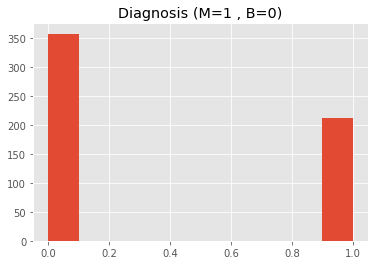

In [9]:
df.describe()
plt.hist(df['diagnosis'])
plt.title('Diagnosis (M=1 , B=0)')
plt.show()

Creating a test set and a training set

In [10]:
from sklearn.model_selection import train_test_split
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1,random_state= 10)

## Linear Regression

In [11]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
y_predict = lr.predict(X_test)
print("Linear Regression's Accuracy is:{}".format(lr.score(X_test,y_test)))

Linear Regression's Accuracy is:0.8566203245942927


In [12]:
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test,y_predict)
MSE

5.617526054432188e-05

In [13]:
from sklearn.feature_selection import f_regression as fr
result = fr(X,y)
f_score = result[0]
p_values = result[1]

columns = list(X.columns)
print(" ")
print(" ")
print(" ")

print("     Features                     ","F-Score  ","P-Values")
print("     ------------                   --------  ---------")

for i in range(0,len(columns)):
    f1 = "%4.2f" % f_score[i]
    p1 = "%2.6f" % p_values[i]
    print("    ",columns[i].ljust(25),f1.rjust(12),"",p1.rjust(8))

 
 
 
     Features                      F-Score   P-Values
     ------------                   --------  ---------
     diagnosis                        66.44  0.000000
     radius_mean                       0.03  0.866442
     texture_mean                      8.17  0.004408
     perimeter_mean                    1.48  0.224329
     area_mean                         0.01  0.929114
     smoothness_mean                 188.31  0.000000
     compactness_mean                507.87  0.000000
     concavity_mean                  204.59  0.000000
     concave points_mean              89.18  0.000000
     symmetry_mean                   134.91  0.000000
     fractal_dimension_mean          811.70  0.000000
     radius_se                         1.40  0.237880
     texture_se                        1.18  0.276947
     perimeter_se                      4.17  0.041637
     area_se                           0.17  0.676320
     smoothness_se                     5.90  0.015452
     compactness_se 

In [14]:
#we just need to keep the p value > 0.5 features
new_features = []

for j in range(0, len(columns)):
      if float(result[1][j]) <= 0.5:
        new_features.append(X.columns[j])
new_features

['diagnosis',
 'texture_mean',
 'perimeter_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst']

In [15]:
X_train_lr = X_train[new_features]
X_test_lr = X_test[new_features]
lr_new = LinearRegression()
lr_new.fit(X_train_lr,y_train)
new_y_predict = lr_new.predict(X_test_lr)
MSE_new = mean_squared_error(y_test,new_y_predict)
MSE_new

5.874104075536601e-05

## Logistic Regression

Logistic regression is widely used for classification of discrete data. In this case we will use it for binary (1,0) classification.

In [16]:
#we select x,y axis and we normalize our data
y = df.diagnosis.values
x_data = df.drop("diagnosis",axis=1)
x = (x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data))
x_train,x_test,y_train,y_test = train_test_split(x,y)

In [17]:
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression(max_iter = 200)
lgr.fit(x_train,y_train)
print("Logistic Regression's Accuracy is:{}".format(lgr.score(x_test,y_test)))

Logistic Regression's Accuracy is:0.951048951048951


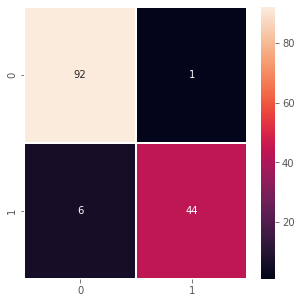

In [18]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
y_true = y_test 
y_pred = lgr.predict(x_test) #Predict data for eveluating 
cm = confusion_matrix(y_true,y_pred)

f,ax = plt.subplots(figsize = (5,5))
sns.heatmap(cm,annot = True,linewidth = 1,fmt =".0f",ax = ax)

In [19]:
MSE_logr = mean_squared_error(y_test,y_pred)
MSE_logr

0.04895104895104895